<a href="https://colab.research.google.com/github/Ashwinprocodes/Rossmann-Sales-Prediction/blob/main/pr_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.


## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [49]:
# import drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# import important library 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pylab

from scipy import stats

import warnings 
warnings.filterwarnings('ignore')

In [51]:
# Importing data of Rossmann store
#df1 is rossman store data
#df2 is store data
df1=pd.read_csv('/content/drive/MyDrive/Project linear regression2/Copy of Rossmann Stores Data.csv')

# import store data from drive 
df2= pd.read_csv("/content/drive/MyDrive/Project linear regression2/Copy of store.csv")

In [52]:
df1.head()
#Checking how data is distributed in first five rows in df1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [53]:
df2.head()
#Checking how data is distributed in first five rows in df2

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [54]:
df1.shape
#Checking rows and columns in df1

(1017209, 9)

In [55]:
df2.shape
#Checking rows and columns in df2

(1115, 10)

In [56]:
df1.tail()
#Checking how data is distributed in last five rows in df1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [57]:
df2.tail()
#Checking how data is distributed in last five rows in df2

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [58]:
df1.describe(include='all')
#Taking general information numerically in all the columns in df1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [59]:
df2.describe(include='all')
#Taking general information numerically in all the columns in df2

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


In [60]:
#Here i will check numerical data colums in dataframe
df1.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.18
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.38
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,1.00


In [61]:
df1.info()
#checking basic information in df1 i.e not null count, datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [62]:
df2.info()
#checking basic information in df2 i.e not null count, datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [63]:

#checking null values present in the df1
df1.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [64]:
#checking null values present in the df2
df2.isnull().sum()

#seems like there is lot null values present in some columns we need to treat it.

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

from above table df2 
( 
CompetitionOpenSinceMonth   has 354 null values, 
CompetitionOpenSinceYear     has 354 null values) 
and
 (
Promo2SinceWeek             has 544 null values, 
Promo2SinceYear             has 544 null values,
PromoInterval               has 544 null values)
having null values in same rows  respectively so we fix the all null values with 0


## DATA CLEANING

On analyzing given data df1 and df2 I have come accross that df2 requires data treatment.

In [97]:
#filling all NAN values with 0 in df2
df2=df2.fillna(0)

In [98]:
#checking df2 after treatment
df2.isnull().sum()

#seems like there is no Nan values present in df2 after treatment

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Merging the two data frames df1 and df2 in one i.e. mdf12

In [99]:
#"Store" columnn is common in both the dataframe. Merging df1 and df2 as mdf12. 
mdf12=pd.merge(df1,df2,how='left',on='Store')

In [100]:
#checking first five columns
mdf12.head()
 

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [101]:
#checking last five columns
mdf12.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [102]:
#Lets check any duplicated data present in mdf12
mdf12.duplicated().sum()

#there is no such duplicated data present in the mdf12

0

In [103]:
#checking shape of the mdf12
mdf12.shape

(1017209, 18)

In [104]:
#checking info
mdf12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [105]:
# checking the descriptive statistics of mdf12 and 
#getting values with 2 decimal digit by using lambda function


mdf12.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.18,5415.98,4.93,1370.17,0.50,11.65,1007.01
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.38,7710.25,4.28,935.36,0.50,15.32,1005.88
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00,700.00,0.00,0.00,0.00,0.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00,2320.00,4.00,2006.00,1.00,1.00,2009.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00,6880.00,9.00,2011.00,1.00,22.00,2012.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,1.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


In [106]:
# whether null values present in it or not 
mdf12.isnull().sum()

#seems there are no null values present

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [107]:
#creating new colums of day, month and year from existing Date column

mdf12['Date'] = pd.to_datetime(mdf12['Date'])
mdf12['Promo2SinceYear']= pd.to_datetime(mdf12['Promo2SinceYear'])

mdf12['month_of_sales'] =  mdf12['Date'].dt.month.astype(int)
mdf12['day_of_sales'] =  mdf12['Date'].dt.day.astype(int)
mdf12['year_of_sales'] =  mdf12['Date'].dt.year 

mdf12['Promo2SinceYear'] =  mdf12['Promo2SinceYear'].dt.year.astype(int)

In [108]:
#Deleting the date column from mdf12
mdf12.drop('Date',inplace=True,axis=1) 

In [109]:
#this is treated final data
mdf12.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month_of_sales,day_of_sales,year_of_sales
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,1970,0,7,31,2015
1,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,1970,"Jan,Apr,Jul,Oct",7,31,2015
2,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,1970,"Jan,Apr,Jul,Oct",7,31,2015
3,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,1970,0,7,31,2015
4,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,1970,0,7,31,2015


## **EXPLORATORY DATA ANALYSIS**

In [78]:
#counting year wise sales
mdf12['year_of_sales'].value_counts().reset_index()

,index,year_of_sales
0,2013,406974
1,2014,373855
2,2015,236380


In [79]:
# relation between year of sales and total sales
a_year_of_sales=mdf12.groupby(['year_of_sales'])['Sales'].sum().reset_index().rename(columns={'year_of_sales': 'Year'})

In [80]:
a_year_of_sales

,Year,Sales
0,2013,2302876084
1,2014,2180804896
2,2015,1389499643


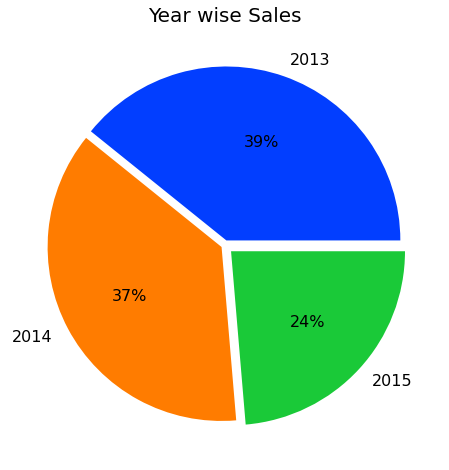

In [81]:
#Ploting pie chart year wise sales

plt.figure(figsize=(10,8))                                          #setting fig size
plt.title('Year wise Sales',size = 20)                              # giving title name
explode = [0.03,0.02,0.05,]                             
colors = sns.color_palette('bright')                               # Seaborn color palette to plot pie chart
plt.pie(a_year_of_sales.Sales, labels=a_year_of_sales.Year, colors=colors,autopct='%.0f%%',explode = explode);

From above pie chart 
we observed that **in 2013 having 39% sales** and **in 2014 having 37%** **sales** but in
# **2015 sales were decreased to 24%**

In [82]:
#There is some connection between year of sales, month of sales with sales
a_month_of_sales=mdf12.groupby(['year_of_sales','month_of_sales'])['Sales'].sum().reset_index()

In [83]:
a_month_of_sales

,year_of_sales,month_of_sales,Sales
0,2013,1,180132207
1,2013,2,171534275
2,2013,3,201180369
3,2013,4,183431432
4,2013,5,185411063
5,2013,6,180702351
6,2013,7,208843882
7,2013,8,198042727
8,2013,9,178053963
9,2013,10,187662330


Text(0.5, 1.0, 'Showing sales by month in year ')

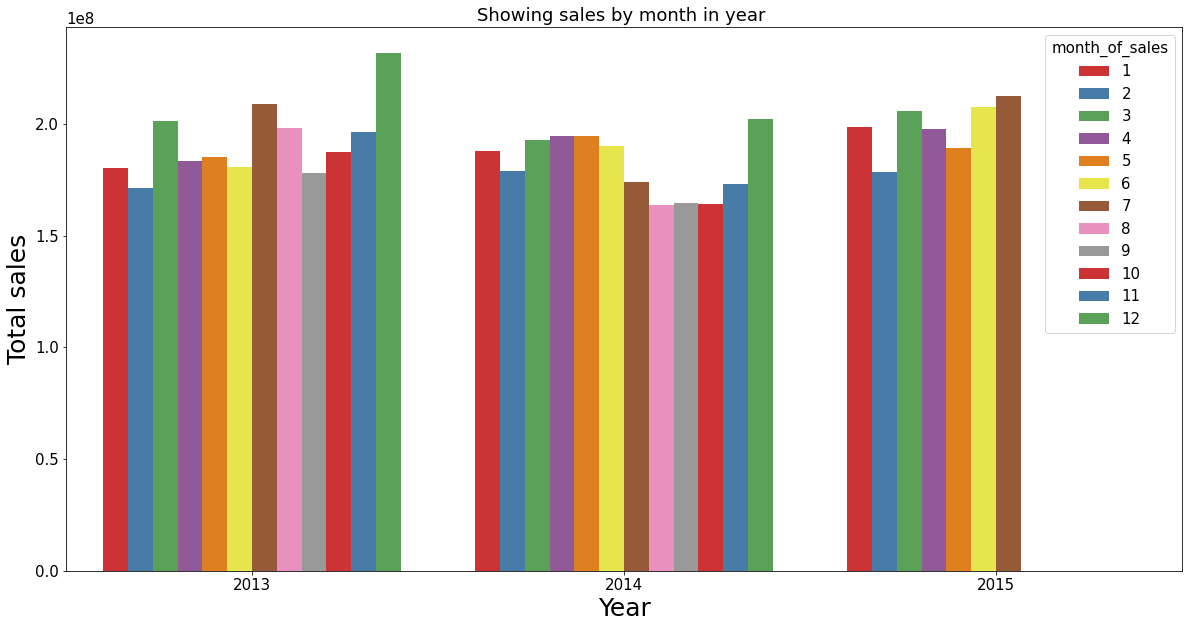

In [84]:
#plotting grouped bar graph for monthly sales
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = '15'
sns.barplot(x="year_of_sales",
           y="Sales",
           hue="month_of_sales",                      #ploting indicators of month from jan(1) to dec(12)
           data=a_month_of_sales,palette='Set1')
plt.xlabel('Year', size=25)
plt.ylabel('Total sales', size=25)                    #sales are here in million
plt.title('Showing sales by month in year ')

According to a grouped bar chart, the months of November and December in 2013 and 2014 had the highest sales, while the month of July had higher sales than other months.

In [85]:
# define categorical feature for shwoing relationship bewteen sales
cat_fe= mdf12.describe(include=['object','category']).columns


In [86]:
cat_fe

Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

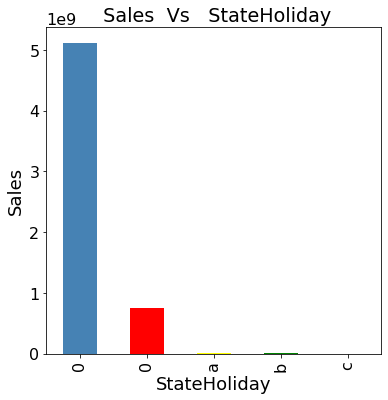

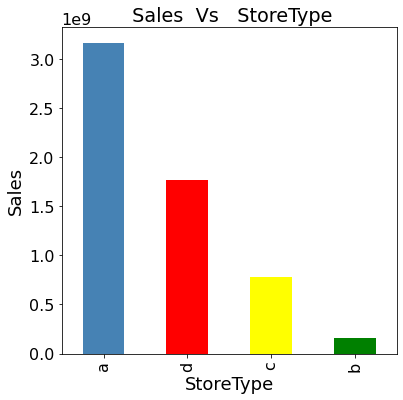

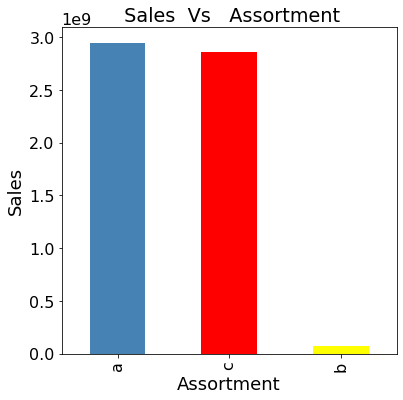

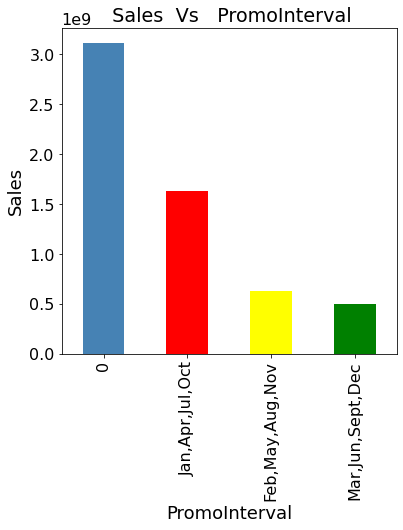

In [87]:
# bar graph representation of categorical feature with Sales
#i=columns in cat_fe(categorial feature)
for i in cat_fe:
    total_num = mdf12.groupby([i])['Sales'].sum().sort_values(ascending = False)
    fig = plt.figure(figsize=(6,6))
    plt.rcParams['font.size'] = '16'

    ax = fig.gca()
    total_num.plot.bar(ax = ax, color=['steelblue','red','yellow','green'])
    ax.set_title( ' Sales  Vs   '   +   i )
    ax.set_xlabel(i,fontsize=18) 
    ax.set_ylabel("Sales",fontsize=18)

### From above Bar Charts we can observe that
The "A" store type has the highest sales, followed by the "basic" and "extended assortment" types, with the promotion period "Jan, Apr, Jul, Oct" having the greatest impact on sales.

## **Checking Store Type detail with respect to Sales and Customers**

In [88]:
#using groupby to get the count of store type
#using groupby to get the sum of sales per store  
#using groupby to get customers visited each store
#using groupby to get average sales per store


store_count=mdf12.groupby('StoreType')['StoreType'].count()                      
sales_per_store = mdf12.groupby('StoreType')['Sales'].sum()                        
customers_per_store = mdf12.groupby('StoreType')['Customers'].sum()             
avg_sales_per_store = mdf12.groupby('StoreType')['Sales'].mean()                

Text(0.5, 1.0, 'Average Sales per Store Type')

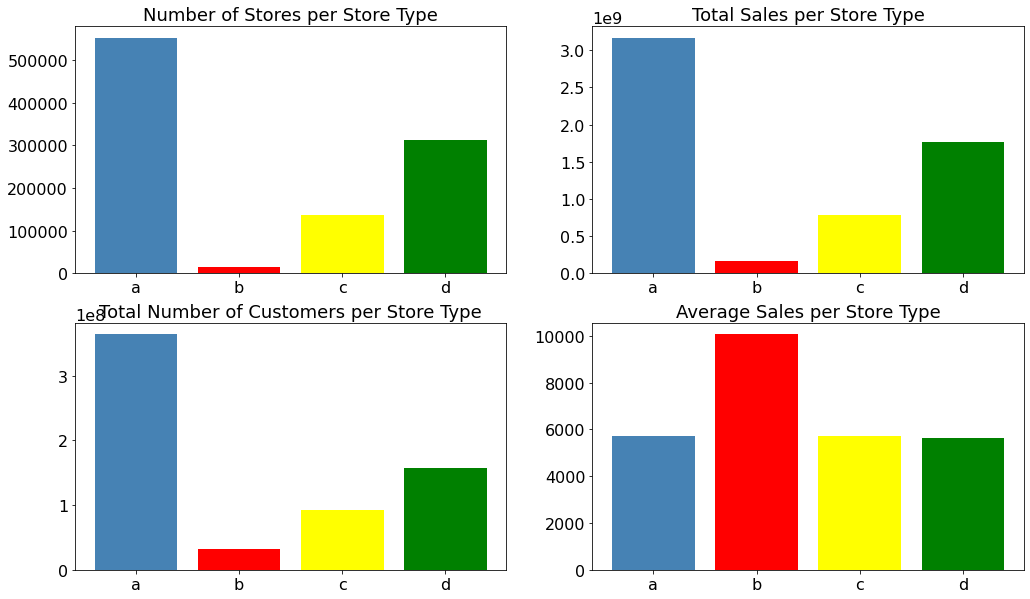

In [89]:
figure, axis = plt.subplots(2, 2,figsize=(17,10))
  
# For Number of Stores per Store Type
axis[0, 0].bar(store_count.index,store_count ,color=['steelblue','red','yellow','green'])
axis[0, 0].set_title("Number of Stores per Store Type",size=18)
  
# For Total Sales per Store Type
axis[0, 1].bar(sales_per_store.index,sales_per_store ,color=['steelblue','red','yellow','green'])
axis[0, 1].set_title("Total Sales per Store Type",size=18)

#Total Number of Customers per Store Type (in Millions)
axis[1, 0].bar(customers_per_store.index,customers_per_store,color=['steelblue','red','yellow','green'] )
axis[1, 0].set_title("Total Number of Customers per Store Type",size=18)

# for Average Sales per Store Type
axis[1, 1].bar(avg_sales_per_store.index,avg_sales_per_store,color=['steelblue','red','yellow','green'] )
axis[1, 1].set_title("Average Sales per Store Type",size=18)

### According to the above bar chart, 

types "a" and "d" of stores are the most ideal since they attract the most customers and generate the greatest amount of sales, however type "b" stores rank highest in terms of average sales.

**Lets do more changes in data as per our requirement**

In [90]:
mdf12.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'month_of_sales', 'day_of_sales',
       'year_of_sales'],
      dtype='object')

In [91]:
# converting data type into integer
mdf12['CompetitionOpenSinceYear']=mdf12['CompetitionOpenSinceYear'].astype(int)

mdf12['CompetitionOpenSinceMonth']=mdf12['CompetitionOpenSinceMonth'].astype(int)

mdf12['Promo2SinceWeek']=mdf12['Promo2SinceWeek'].astype(int)

In [92]:
mdf12.info()
#above columns converted to integer data type 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1017209 non-null  float64
 11  CompetitionOpenSinceMonth  1017209 non-null  int64  
 12  CompetitionOpenSinceYear   1017209 non-null  int64  
 13  Promo2      

In [93]:
# creating new_columns as variable which contain some important numerical features
new_columns=['DayOfWeek','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear']

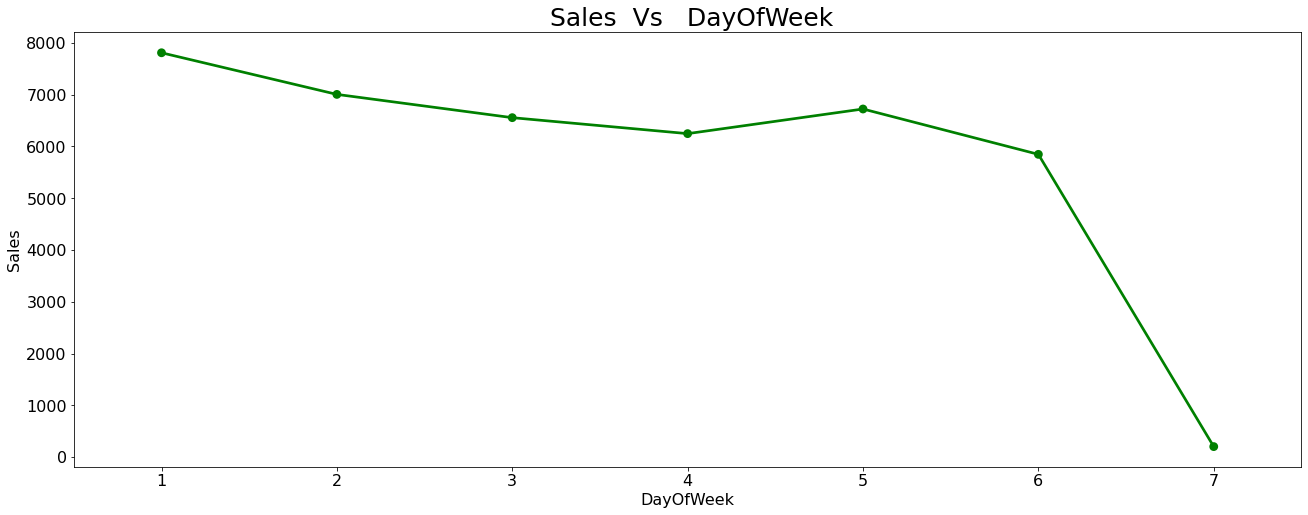

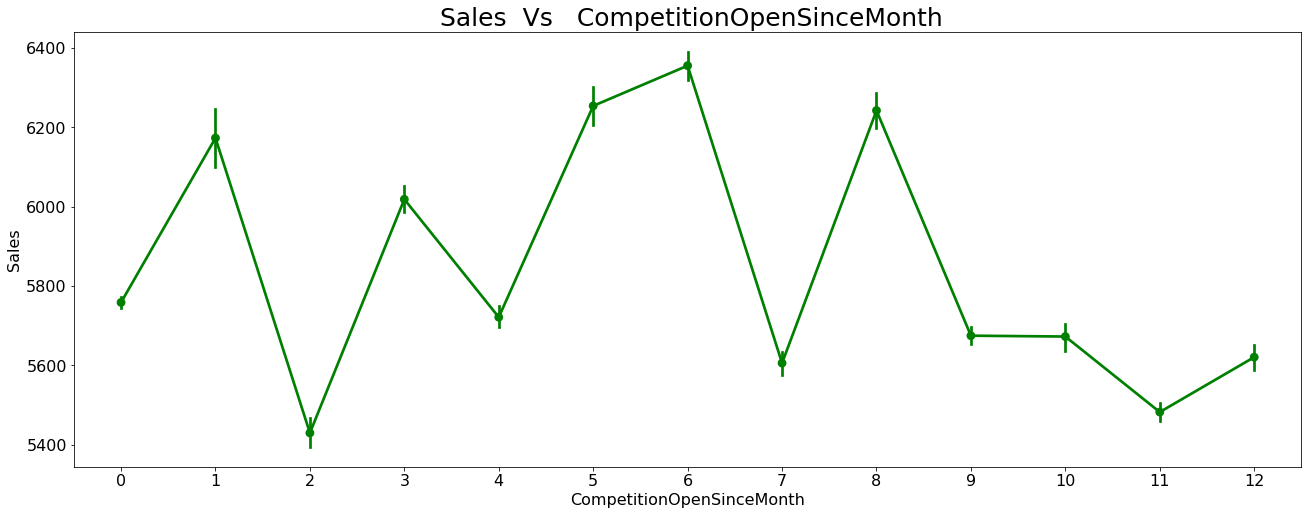

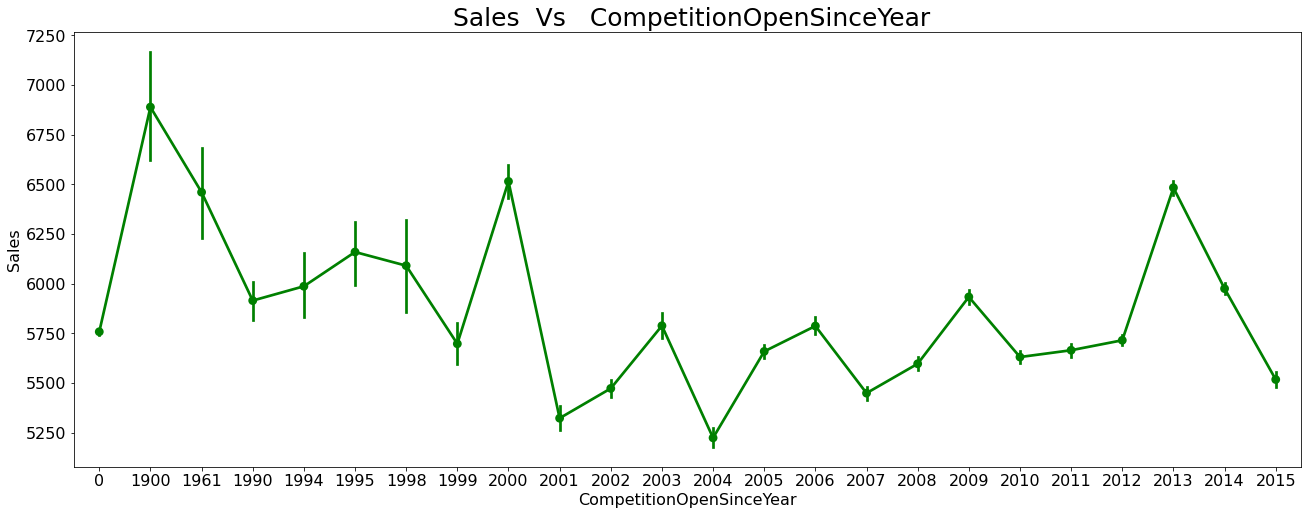

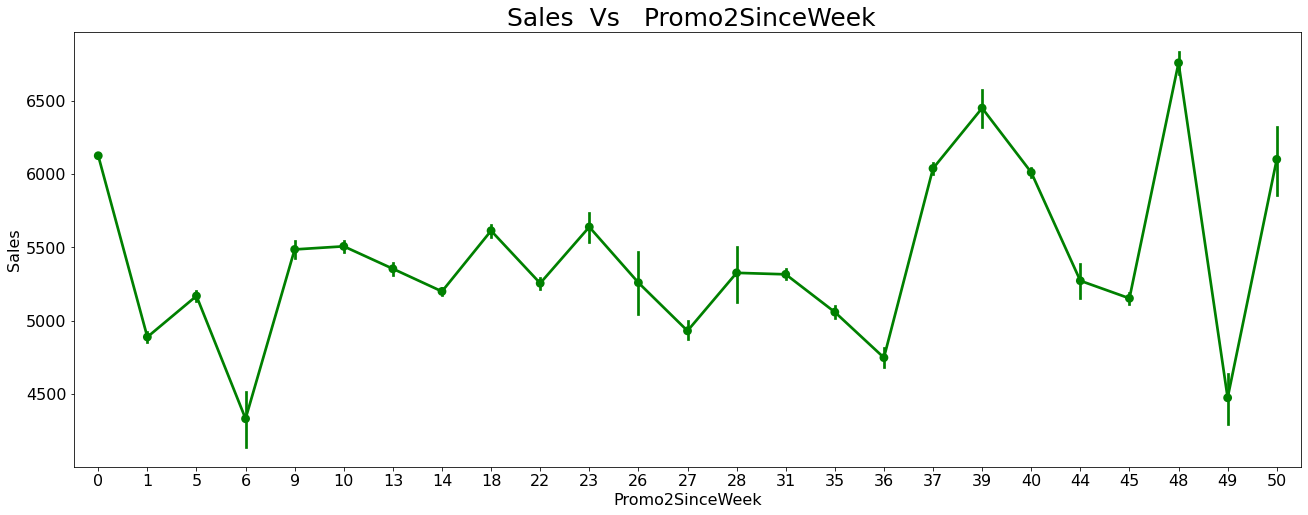

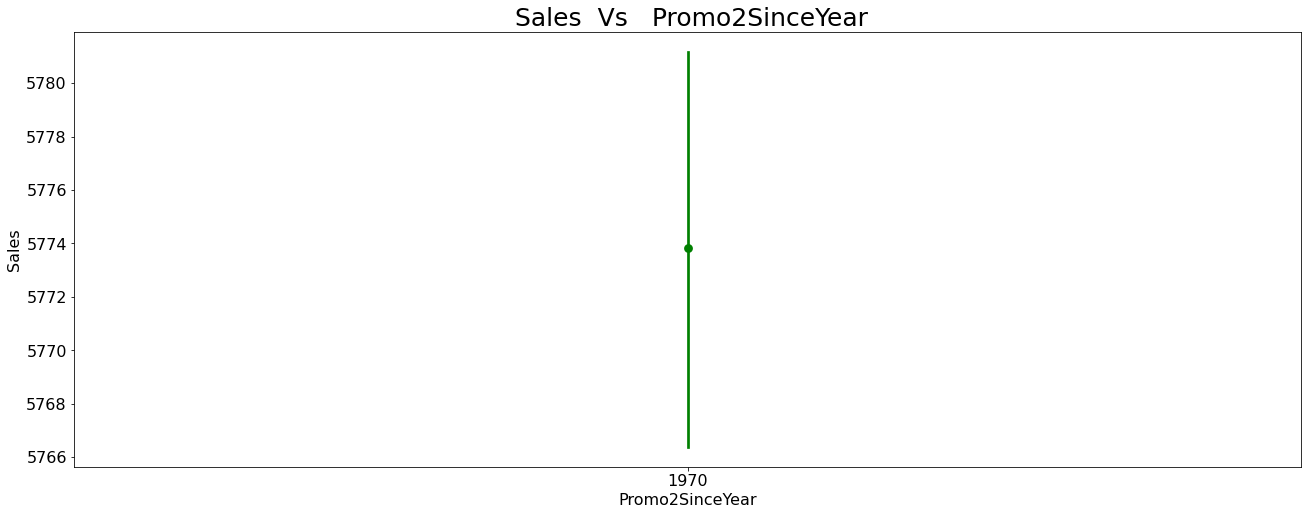

In [94]:
# line point plot grpah show relationship between Sales and new_columns features
for g in new_columns:
   plt.figure(figsize = (22,8))
   plt.rcParams['font.size'] = '16'
   sns.pointplot(x=g,y = mdf12['Sales'],data = mdf12,color='g')
   plt.title(' Sales  Vs   '   +   g, size=25)

From the point plot shown above

1. Sales are high in the beginning of the week and fall off at the end. In the middle of the week, sales are consistent.

2. Sales were high in the early 1900s to 2000s since there was little competition.

3. Between weeks 36 and 39, Promo2 has a significant impact on sales, and starting in week 45, it has a quick impact.

## **Plot between Dayof Week and Open & promo.**

Text(0, 0.5, 'Store open/close Count')

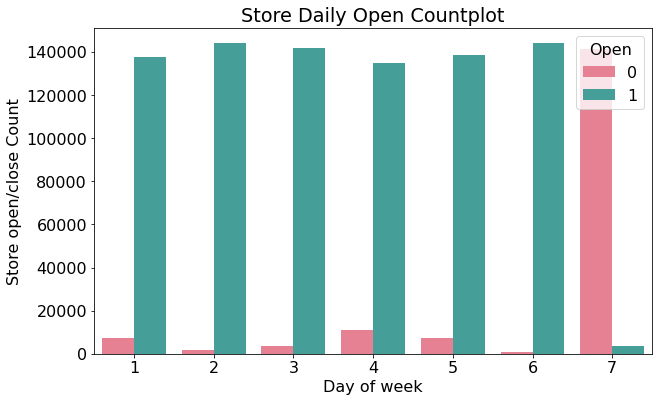

In [111]:
# ploting count plot 0 = closed, 1 = open
plt.figure(figsize=(10,6))
sns.countplot(x= 'DayOfWeek', hue='Open', data= mdf12, palette="husl")
plt.title('Store Daily Open Countplot')
plt.xlabel('Day of week')
plt.ylabel('Store open/close Count')

### From the above bar graph, we can see that on Day 7 of the week, the majority of stores were closed.

Text(0, 0.5, 'Promo count')

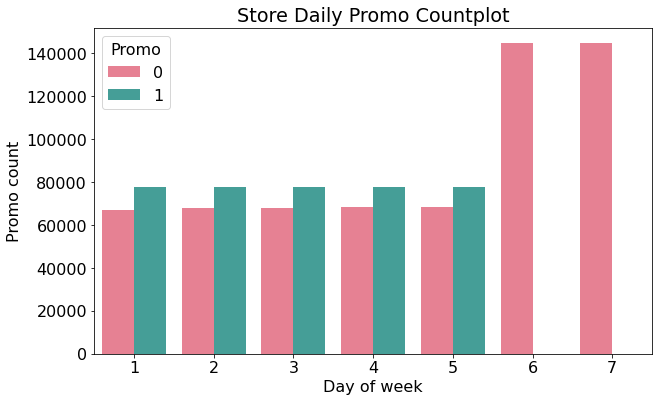

In [96]:
# ploting count plot 0 = store is not participating, 1 = store is participating
plt.figure(figsize=(10,6))

sns.countplot(x= 'DayOfWeek', hue='Promo', data= mdf12, palette='husl')

plt.title('Store Daily Promo Countplot')
plt.xlabel('Day of week')
plt.ylabel('Promo count')

### According to the above bar graph, the store ran promotions through the fifth day of the week.

# **Conclusion on EDA**

-->Due to the majority of stores being closed on Saturday, sales were down.

-->Early 1900s through 2000s saw little competition, which led to high sales.


-->Customers favoured store types "a" and "d," which is why they had strong sales.

-->2013 to 2014 saw consistent sales, but 2015 saw a sharp decline.

-->Promoting took place from Monday through Friday.

